In [3]:
import pandas as pd
import lightkurve as lk
import numpy as npxa
import matplotlib.pyplot as plt
import juliandate as jd
from astropy.time import Time
import astropy.io.fits as fits
from astropy.table import Table

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [4]:
i1 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_lightcurve.csv')
i2 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_added_lightcurve.csv')

i1_V = i1[i1['Filter'] == 'V']
i1_g = i1[i1['Filter'] == 'g']
i2_V = i2[i2['Filter'] == 'V']
i2_g = i2[i2['Filter'] == 'g']

subset = i2_g
band = 'g'

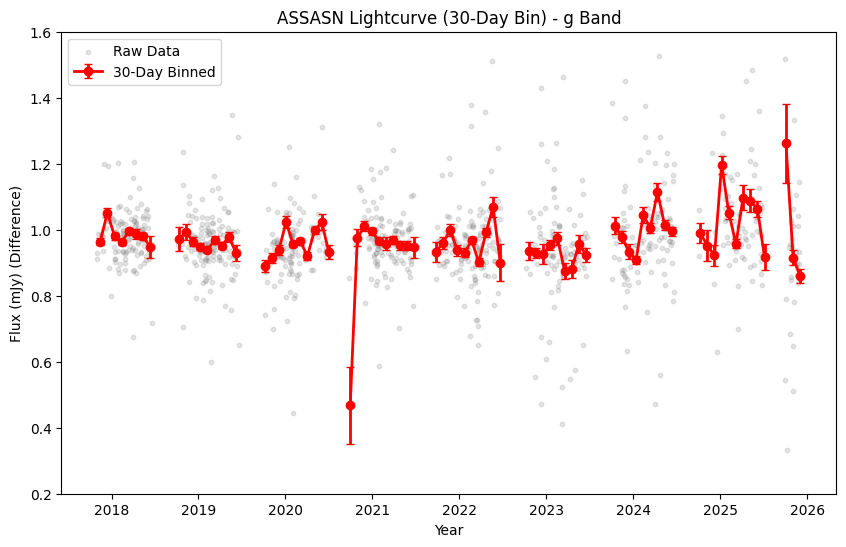

In [7]:
daycurve = lk.LightCurve(time=subset['HJD'], flux=subset['flux(mJy)'], flux_err=subset['flux_err'])
binned_lc = daycurve.bin(time_bin_size=30)

t_years_raw = Time(daycurve.time.value, format='jd').decimalyear
t_years_binned = Time(binned_lc.time.value, format='jd').decimalyear
plt.figure(figsize=(10, 6))
plt.scatter(t_years_raw, daycurve.flux.value, alpha=0.2, color='gray', s=10, label='Raw Data')

plt.ylim(0.2, 1.6)
plt.errorbar(t_years_binned, binned_lc.flux.value, yerr=binned_lc.flux_err.value, fmt='o-', color='red', linewidth=2, capsize=3, label='30-Day Binned')
plt.xlabel("Year")
plt.ylabel("Flux (mJy) (Difference)")
plt.title(f"ASSASN Lightcurve (30-Day Bin) - {band} Band")
plt.legend()
plt.show()

In [6]:
ztf_file = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ZTF Data/lc_samiclagn.fits'

ztf = Table.read(ztf_file)
df = ztf.to_pandas()
df = df.dropna(subset=['mag'])
filters = {1: 'g', 2: 'r', 3: 'i'}

